In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('transaction_data.csv')

In [3]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
UserId                    1083818 non-null int64
TransactionId             1083818 non-null int64
TransactionTime           1083818 non-null object
ItemCode                  1083818 non-null int64
ItemDescription           1080910 non-null object
NumberOfItemsPurchased    1083818 non-null int64
CostPerItem               1083818 non-null float64
Country                   1083818 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 53.7+ MB


In [5]:
# change description - UPPER case to LOWER case
df['ItemDescription']=df.ItemDescription.str.lower()

In [6]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,family album white picture frame,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,london bus coffee mug,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,set 12 colour pencils dolly girl,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,union jack flag luggage tag,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,washroom metal sign,3,3.40,United Kingdom


In [7]:
#Data Cleaning
# check out the missing values
df=df.replace(-1,np.nan,regex=True)

In [8]:
#Remove Quantity with negative values
df.loc[df['NumberOfItemsPurchased']<0,'NumberOfItemsPurchased']=np.nan

In [9]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

UserId                    270160
NumberOfItemsPurchased     21248
ItemCode                    5592
ItemDescription             2908
Country                        0
CostPerItem                    0
TransactionTime                0
TransactionId                  0
dtype: int64

In [10]:
# check out the rows with missing values
X=df[df.isnull().any(axis=1)].head()

In [11]:
X

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
4,NaN,6143225,Mon Sep 10 11:58:00 IST 2018,1733592.0,washroom metal sign,3.0,3.40,United Kingdom
7,NaN,6143225,Mon Sep 10 11:58:00 IST 2018,447867.0,skulls writing set,120.0,1.15,United Kingdom
13,NaN,6058140,Mon Jul 02 07:33:00 IST 2018,435225.0,lunch bag red retrospot,60.0,6.85,United Kingdom
17,NaN,6288843,Sun Dec 30 12:58:00 IST 2018,489594.0,vintage christmas tablecloth,3.0,34.45,United Kingdom
23,NaN,6388019,Sat Feb 16 13:24:00 IST 2019,490329.0,roll wrap vintage christmas,30.0,3.40,United Kingdom


In [12]:
#Remove missing values

# df_new without missing values
df_new = df.dropna()

In [13]:
# check missing values for each column 
df_new.isnull().sum().sort_values(ascending=False)

Country                   0
CostPerItem               0
NumberOfItemsPurchased    0
ItemDescription           0
ItemCode                  0
TransactionTime           0
TransactionId             0
UserId                    0
dtype: int64

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793006 entries, 0 to 1083817
Data columns (total 8 columns):
UserId                    793006 non-null float64
TransactionId             793006 non-null int64
TransactionTime           793006 non-null object
ItemCode                  793006 non-null float64
ItemDescription           793006 non-null object
NumberOfItemsPurchased    793006 non-null float64
CostPerItem               793006 non-null float64
Country                   793006 non-null object
dtypes: float64(4), int64(1), object(3)
memory usage: 45.4+ MB


In [15]:
# change columns type - String to Int type 
df_new['UserId'] = df_new['UserId'].astype('int64')

D:\pyt\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793006 entries, 0 to 1083817
Data columns (total 8 columns):
UserId                    793006 non-null int64
TransactionId             793006 non-null int64
TransactionTime           793006 non-null object
ItemCode                  793006 non-null float64
ItemDescription           793006 non-null object
NumberOfItemsPurchased    793006 non-null float64
CostPerItem               793006 non-null float64
Country                   793006 non-null object
dtypes: float64(3), int64(2), object(3)
memory usage: 45.4+ MB


In [17]:
df_new.describe().round(2)

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,793006.00,793006.00,793006.00,793006.00,793006.00
mean,321328.57,6166807.72,645810.04,39.13,8.26
std,35905.64,144168.77,432821.20,542.11,2693.86
min,259266.00,5900015.00,42.00,3.00,0.00
25%,293475.00,6041585.00,462567.00,6.00,1.73
50%,318339.00,6180823.00,475986.00,18.00,2.70
75%,352821.00,6293012.00,488670.00,36.00,5.18
max,384027.00,6397457.00,1894494.00,242985.00,1696285.44


In [18]:
#Add the column - amount_spent
df_new['amount_spent'] = df_new['NumberOfItemsPurchased'] * df_new['CostPerItem']

D:\pyt\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
#Exploratory Data Analysis (EDA)

#How many orders made by the users?
orders = df_new.groupby(by=['UserId','Country'], as_index=False)['TransactionId'].count()

In [20]:
orders.head()

,UserId,Country,TransactionId
0,259266,United Kingdom,2
1,259287,Iceland,364
2,259308,Finland,54
3,259329,Italy,144
4,259350,Norway,32


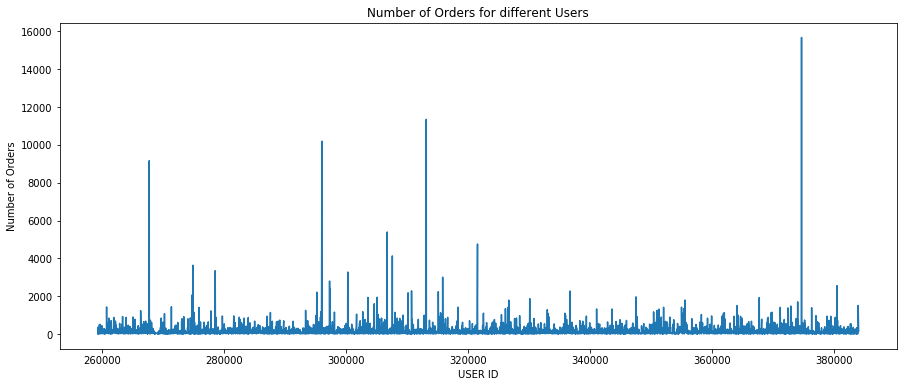

In [21]:
plt.subplots(figsize=(15,6))
plt.plot(orders.UserId, orders.TransactionId)
plt.xlabel('USER ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Users')
plt.show()

In [22]:
#Check TOP 5 most number of orders
print('The TOP 5 users with most number of orders...')
orders.sort_values(by='TransactionId', ascending=False).head()

The TOP 5 users with most number of orders...


,UserId,Country,TransactionId
4016,374661,United Kingdom,15676
1888,313131,EIRE,11350
1298,296016,United Kingdom,10190
334,267708,United Kingdom,9160
1670,306726,United Kingdom,5394


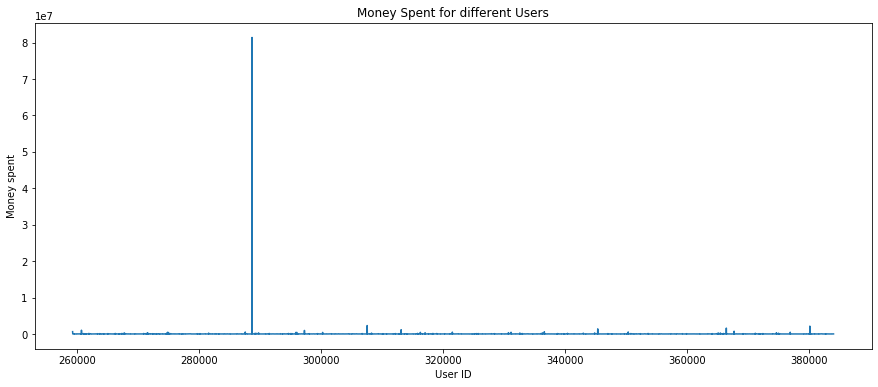

In [23]:
#How much money spent by the users?

money_spent = df_new.groupby(by=['UserId','Country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.UserId, money_spent.amount_spent)
plt.xlabel('User ID')
plt.ylabel('Money spent')
plt.title('Money Spent for different Users')
plt.show()

In [24]:
#Check TOP 5 highest money spent
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,UserId,Country,amount_spent
1046,288687,United Kingdom,81421701.12
1698,307566,Netherlands,2317587.90
4206,380142,United Kingdom,2152388.16
3734,366450,United Kingdom,1613145.84
3015,345366,United Kingdom,1399617.66


In [25]:
#Discover patterns for CostPerItem
df_new.CostPerItem.describe()

count    7.930060e+05
mean     8.263217e+00
std      2.693863e+03
min      0.000000e+00
25%      1.730000e+00
50%      2.700000e+00
75%      5.180000e+00
max      1.696285e+06
Name: CostPerItem, dtype: float64

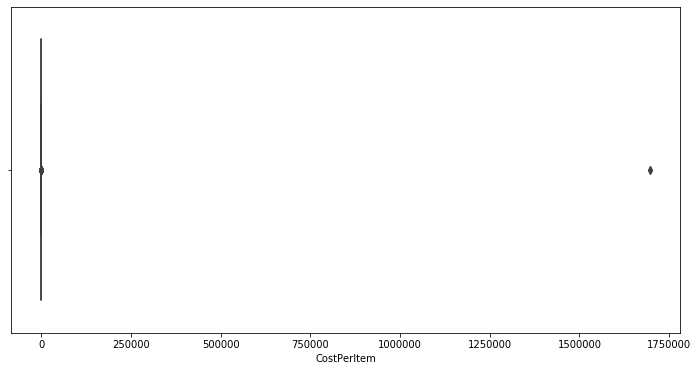

In [26]:
# check the distribution of CostPerItem
plt.subplots(figsize=(12,6))
sns.boxplot(df_new.CostPerItem)
plt.show()

In [27]:
#We see that there are CostPerItem = 0 (FREE items)
df_free = df_new[df_new.CostPerItem == 0]

In [28]:
df_free.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,amount_spent
5544,274701,6331369,Tue Jan 22 07:49:00 IST 2019,463869.0,paper bunting vintage paisley,72.0,0.0,United Kingdom,0.0
5623,307566,6211161,Wed Nov 07 10:19:00 IST 2018,457506.0,polkadot rain hat,432.0,0.0,Netherlands,0.0
40452,302610,6037581,Sat Jun 16 10:42:00 IST 2018,465402.0,heart garland rustic padded,6.0,0.0,United Kingdom,0.0
55106,353178,6174124,Sun Oct 07 08:24:00 IST 2018,465507.0,oval wall mirror diamante,3.0,0.0,United Kingdom,0.0
59739,261324,6350454,Wed Jan 30 09:23:00 IST 2019,491547.0,set of 2 trays home sweet home,6.0,0.0,Norway,0.0


In [29]:
#Discover patterns for each Country
group_country_orders = df_new.groupby('Country')['TransactionId'].count().sort_values()

D:\pyt\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


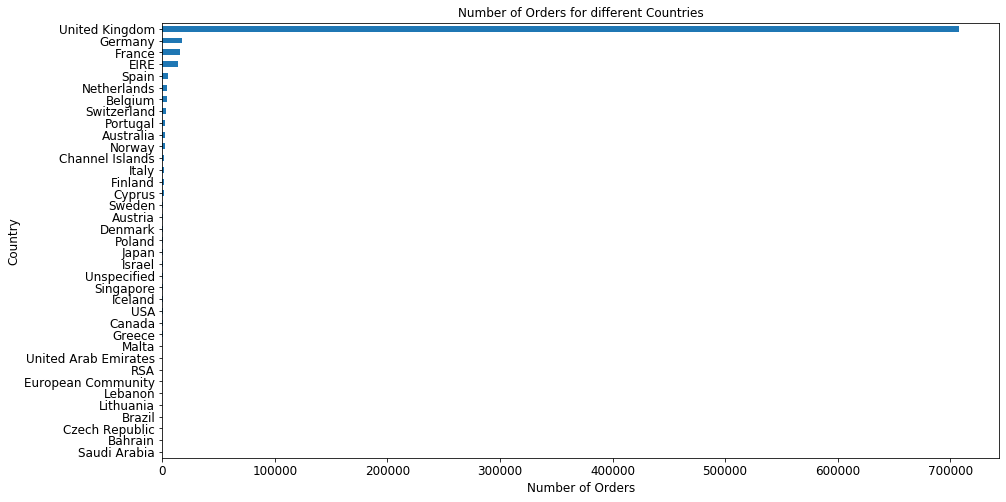

In [30]:
# plot number of unique users in each country 
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

In [31]:
#How much money spent by each country?
group_country_amount_spent = df_new.groupby('Country')['amount_spent'].sum().sort_values()

D:\pyt\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


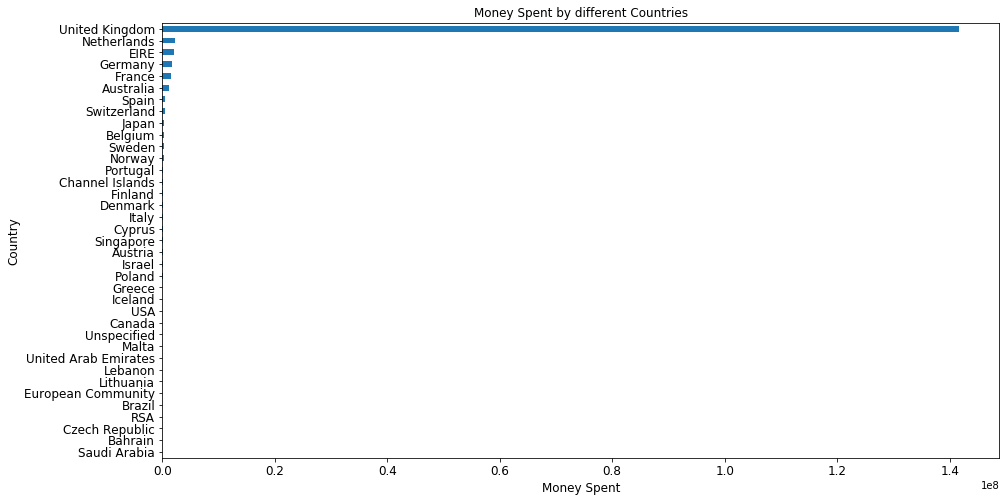

In [32]:
# plot total money spent by each country 
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12)
plt.xlabel('Money Spent', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

In [33]:
# change the TransactionDate format - String to Timestamp format
df_new['TransactionTime'] = pd.to_datetime(df.TransactionTime, format='%a %b %d %H:%M:%S IST %Y')

D:\pyt\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
from datetime import datetime

In [35]:
#Add the columns - Month, Day and Hour for the invoice

df_new.insert(loc=3, column='year_month', value=df_new['TransactionTime'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=4, column='month', value=df_new.TransactionTime.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=5, column='day', value=(df_new.TransactionTime.dt.dayofweek)+1)
df_new.insert(loc=6, column='hour', value=df_new.TransactionTime.dt.hour)

In [36]:
df_new.head()

,UserId,TransactionId,TransactionTime,year_month,month,day,hour,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,amount_spent
0,278166,6355745,2019-02-02 12:50:00,201902,2,6,12,465549.0,family album white picture frame,6.0,11.73,United Kingdom,70.38
1,337701,6283376,2018-12-26 09:06:00,201812,12,3,9,482370.0,london bus coffee mug,3.0,3.52,United Kingdom,10.56
2,267099,6385599,2019-02-15 09:45:00,201902,2,5,9,490728.0,set 12 colour pencils dolly girl,72.0,0.90,France,64.80
3,380478,6044973,2018-06-22 07:14:00,201806,6,5,7,459186.0,union jack flag luggage tag,3.0,1.73,United Kingdom,5.19
5,285957,6307136,2019-01-11 09:50:00,201901,1,5,9,1787247.0,cut glass t-light holder octagon,12.0,3.52,United Kingdom,42.24


D:\pyt\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


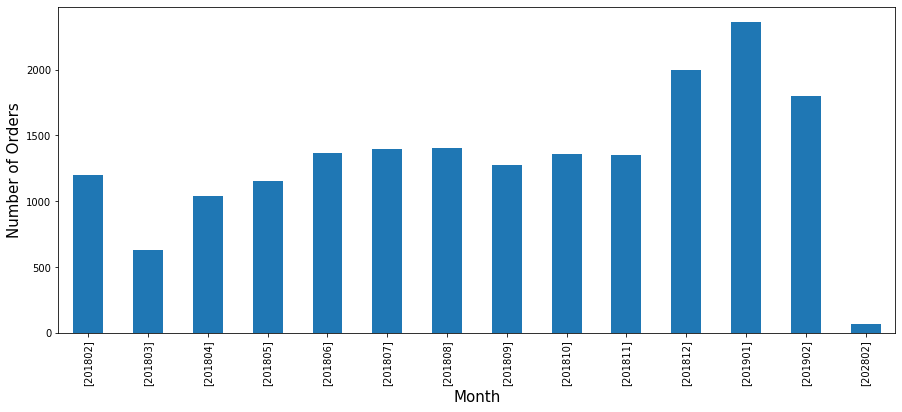

In [37]:
#orders (per month)
ax = df_new.groupby('TransactionId')['year_month'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
plt.show()

D:\pyt\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


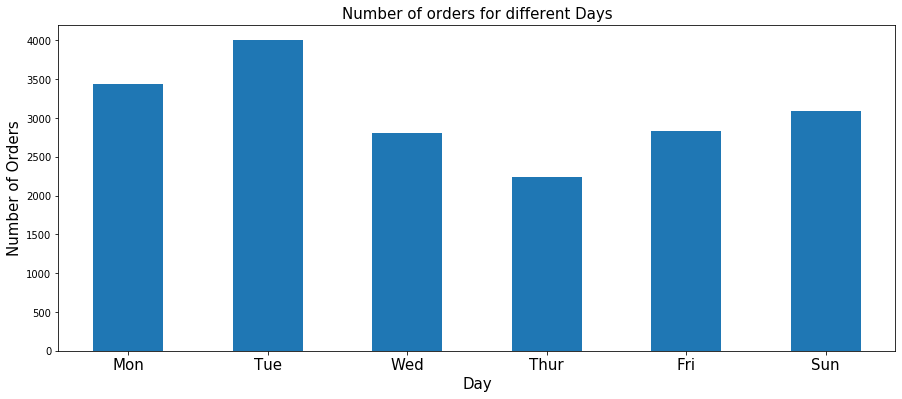

In [39]:
# orders (per day)

ax = df_new.groupby('TransactionId')['day'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

D:\pyt\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


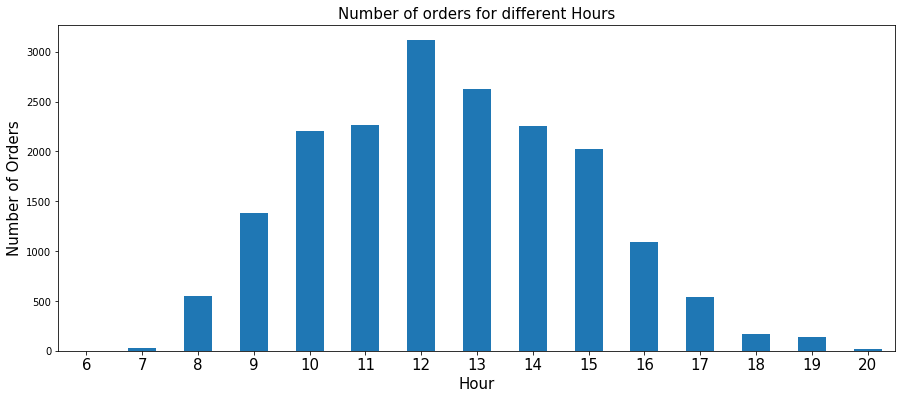

In [43]:
# orders (per hour)

ax = df_new.groupby('TransactionId')['hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()